mapping ids...
creating nodes...
creating edges...
rendering chart...


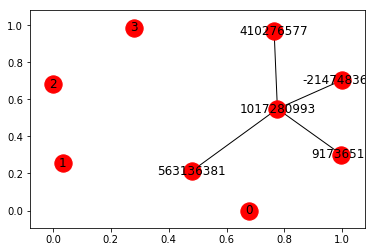

In [13]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

with open('test.csv','rt') as heroIn: # reads in the network file
    heroIn = csv.reader(heroIn)
    headers = next(heroIn)
    heroes = [row for row in heroIn]
    
uniqueHeroes = list(set([row[0] for row in heroes])) #takes the reduantices of the superhero networks

id=list(enumerate(uniqueHeroes))# creates a list of tuples with unique ids and their names for each superhero in the network

keys = {name: i for i, name in enumerate(uniqueHeroes)} #creates a dictionary(hash map) that maps each id to the superhero names
 
links = [] #creates a blank list
print ('mapping ids...')
for row in heroes: #maps all of the names in the csv file to their id number
    try:
        links.append({keys[row[0]]: keys[row[1]]})
    except: 
        links.append({row[0]: row[1]})

G = nx.Graph() #creates a graph
heroNodeId=[] #takes source and target edges

for row in id:
    heroNodeId.append(row[0])

print ('creating nodes...')    
G.add_nodes_from(heroNodeId) #creates nodes for the graph.
print ('creating edges...')
for node in links:#loops through each link and changes each dictionary to a tuple so networkx can read in the information
    edges = list(node.items())
    G.add_edge(*edges[0])#takes the tuple from the list and unpacks the tuples
print ('rendering chart...')
nx.draw_networkx(G)